# Week 8 assignment - Due in Week 9
### Use the Iris dataset to separate the 150 data points into three clusters. (please note you should not use the "class" attribute in your feature set).


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import cluster
import numpy as np
%matplotlib inline

## 1. Use KMeans to do the clustering, use 'petal width', 'sepal width' to do the scatter plot and use cluster label as color.

In [2]:
iris = pd.read_csv('iris.txt', header = None)
iris.columns=['sepal-L','sepal-W','petal-L','petal-W','class']
iris_data = iris.drop('class',axis = 1)

In [3]:
k_means = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
k_means.fit(iris_data) 
iris_data['cluster'] = k_means.labels_

In [4]:
print(iris_data)

     sepal-L  sepal-W  petal-L  petal-W  cluster
0        5.1      3.5      1.4      0.2        1
1        4.9      3.0      1.4      0.2        1
2        4.7      3.2      1.3      0.2        1
3        4.6      3.1      1.5      0.2        1
4        5.0      3.6      1.4      0.2        1
..       ...      ...      ...      ...      ...
145      6.7      3.0      5.2      2.3        2
146      6.3      2.5      5.0      1.9        0
147      6.5      3.0      5.2      2.0        2
148      6.2      3.4      5.4      2.3        2
149      5.9      3.0      5.1      1.8        0

[150 rows x 5 columns]


In [5]:
iris_data.dtypes

sepal-L    float64
sepal-W    float64
petal-L    float64
petal-W    float64
cluster      int32
dtype: object

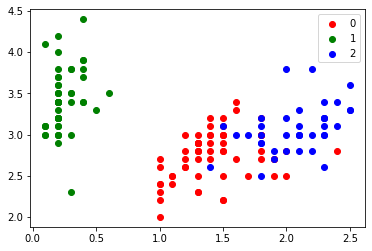

In [6]:
colors = ['r','g','b']
for i in range(3):
    x = np.array(iris_data.loc[iris_data['cluster']==i]['petal-W'])
    y = np.array(iris_data.loc[iris_data['cluster']==i]['sepal-W'])
    plt.scatter(x,y,c = colors[i], marker = "o",label = i)
plt.legend()
plt.show()

## 2. Use Complete Link to do the clustering, use 'petal width', 'sepal width' to do the scatter plot and use cluster label as color.

In [7]:
from scipy.cluster import hierarchy

In [8]:
iris_data = iris_data.drop('cluster',axis=1)

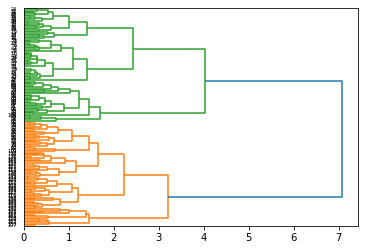

In [9]:
iris_link = hierarchy.linkage(iris_data.values, 'complete')
dn = hierarchy.dendrogram(iris_link,orientation='right')

In [10]:
labels = hierarchy.fcluster(iris_link, t=3.5, criterion='distance')
iris_data['cluster'] = labels

In [11]:
print(iris_data)

     sepal-L  sepal-W  petal-L  petal-W  cluster
0        5.1      3.5      1.4      0.2        3
1        4.9      3.0      1.4      0.2        3
2        4.7      3.2      1.3      0.2        3
3        4.6      3.1      1.5      0.2        3
4        5.0      3.6      1.4      0.2        3
..       ...      ...      ...      ...      ...
145      6.7      3.0      5.2      2.3        1
146      6.3      2.5      5.0      1.9        1
147      6.5      3.0      5.2      2.0        1
148      6.2      3.4      5.4      2.3        1
149      5.9      3.0      5.1      1.8        1

[150 rows x 5 columns]


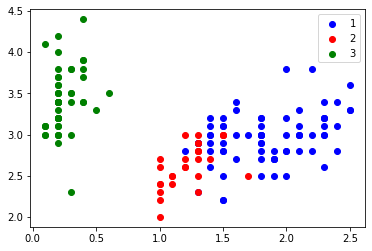

In [12]:
labels = hierarchy.fcluster(iris_link, t=3.5, criterion='distance')
iris_data['cluster'] = labels
colors = ['b','r','g']
for i in range(1,4):
    x = np.array(iris_data.loc[iris_data['cluster']==i]['petal-W'])
    y = np.array(iris_data.loc[iris_data['cluster']==i]['sepal-W'])
    plt.scatter(x,y,c = colors[i-1], marker = "o",label = i)
plt.legend()
plt.show()

## 3. Choose one density-based clustering algorithm and present the clustering results.

In [13]:
iris_data = iris_data.drop('cluster',axis=1)

<AxesSubplot:xlabel='petal-W', ylabel='sepal-W'>

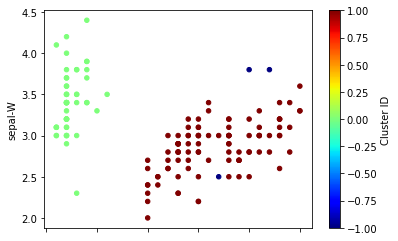

In [14]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.7, min_samples=5).fit(iris_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((iris_data,labels), axis=1)
result.plot.scatter(x='petal-W',y='sepal-W',c='Cluster ID', colormap='jet')

##  4. Discuss the clustering mechanisms and results using the method in Q1, 2, and 3.

r： 

    K-means clustering starts from random centroids, moves them to minimize the sum of squared distances. As the result shows, it can separate points into pre-speficied number of clusters, and the size of each cluster is close.

    Hierarchical clustering groups points into nested clusters, it starts from single points, makes the two closest clusters into a bigger one. For specific number of clusters, we need to analyze the dendrogram. As the result shows, hierarchical clustering can only split points in the same level, which means if the classes are different in inconsistent level, we are going to give up the accuracy of bigger clustering or have to grain an isolated class.
    
    Density-based clustering groups points by density in high-dimensional space. The points get closer, they are easier to be divided into one group. The DBSCAN method needs hyper-para eps and min-samples, which is input by user and should be adjusted by the clustering result. As the result shows, it is insensitive to bigger clusters, and produce isolated point.

##  5. Review and compare different clustering algorithms and choose another clustering algorithm for the 'elliptical.txt' dataset. Reference link: Clustering Algorithms

In [15]:
ell = pd.read_csv('elliptical.txt',sep = ' ',header = None)
ell.columns=['x','y']

<AxesSubplot:xlabel='x', ylabel='y'>

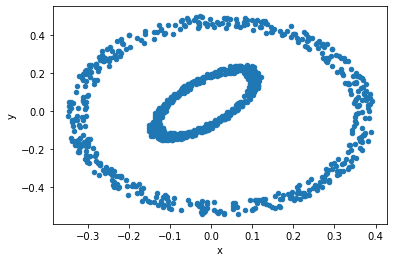

In [16]:
ell.plot.scatter(x='x',y='y')

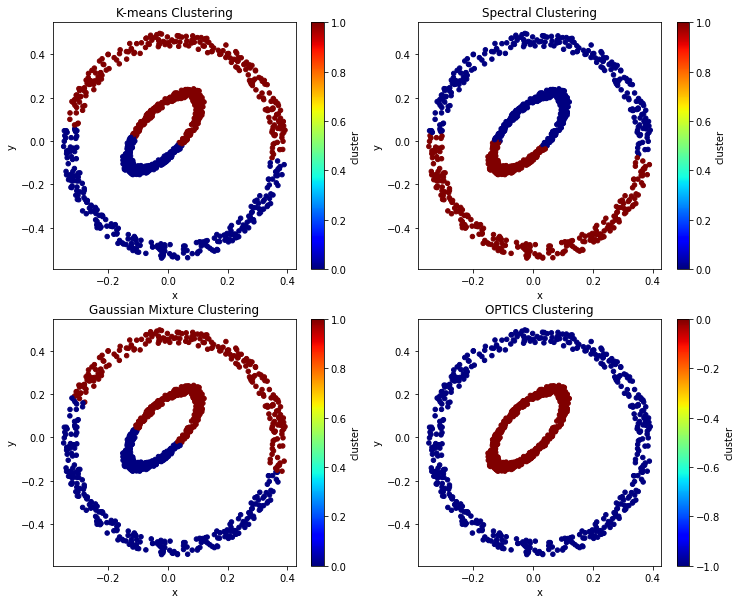

In [24]:
from sklearn.cluster import SpectralClustering,OPTICS,KMeans
from sklearn.mixture import GaussianMixture as GMM
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize=(12,10))

km = KMeans(n_clusters = 2,max_iter=50,random_state = 1)
km.fit(ell)
ell['cluster']=km.labels_
ell.plot.scatter(x='x',y='y',c='cluster',colormap='jet',ax = ax1)
ax1.set_title('K-means Clustering')
ell = ell.drop('cluster',axis = 1)

spe = SpectralClustering(n_clusters = 2,random_state = 1)
spe.fit(ell)
ell['cluster'] = spe.labels_
ell.plot.scatter(x='x',y='y',c='cluster',colormap='jet',ax = ax2)
ax2.set_title('Spectral Clustering')
ell = ell.drop('cluster',axis = 1)

gmm = GMM(n_components = 2,random_state=1)
gmm.fit(ell)
ell['cluster'] = gmm.predict(ell)
ell.plot.scatter(x='x',y='y',c='cluster',colormap='jet',ax = ax3)
ax3.set_title('Gaussian Mixture Clustering')
ell = ell.drop('cluster',axis = 1)

opt = OPTICS(eps=10,min_samples = 80)
opt.fit(ell)
ell['cluster'] = opt.labels_
ell.plot.scatter(x='x',y='y',c='cluster',colormap='jet',ax = ax4)
ax4.set_title('OPTICS Clustering')
ell = ell.drop('cluster',axis = 1)
